In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Usando Matplot para mostrar imagem


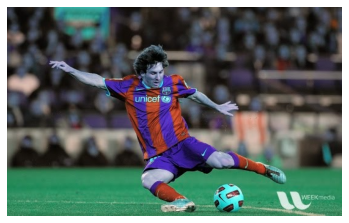

In [27]:
img = cv.imread('/home/silvio/messi5.jpg')

plt.axis("off")
plt.imshow(img)
plt.show()

## Modificando pixel da imagem

In [ ]:
px = img[100,100]
print( px )

blue = img[100,100,0]
print( blue )

img[100,100] = [255,255,255]
print( img[100,100] )

In [4]:
# accessing RED value
print(img.item(10,10,2))
print(img.itemset((10,10,2),100))
print(img.item(10,10,2))

89
None
100


In [6]:
print( img.shape )
print( img.size )
print( img.dtype )


(379, 570, 3)
648090
uint8


## Selecionando parte da imagem e copiando em outra parte da imagem

In [28]:
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

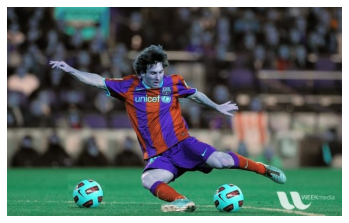

In [29]:
plt.axis("off")
plt.imshow(img)
plt.show()

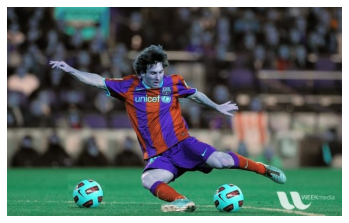

In [30]:
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
plt.axis("off")
plt.imshow(img)
plt.show()

## Incluindo Borda

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
BLUE = [255,0,0]
img1 = cv.imread('/home/silvio/opencv-logo.png')

#img1 = cv.imread('/home/silvio/messi5.jpg')

replicate = cv.copyMakeBorder(img1,30,30,30,30,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

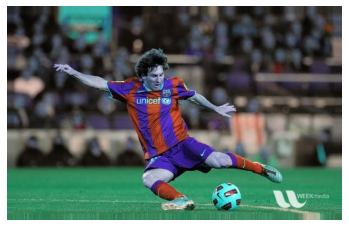

In [35]:
plt.axis("off")
plt.imshow(replicate,'gray')
plt.show()

## Representação de imagem
* HSL (hue, saturation, lightness) 
* HSV (hue, saturation, value) 
* RGB (Red Green Blue)


In [1]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [2]:
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [3]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


In [5]:
import numpy as np
import cv2 as cv
img = cv.imread('/home/silvio/messi5.jpg')
res = cv.resize(img,None,fx=20, fy=20, interpolation = cv.INTER_CUBIC)
#OR
#height, width = img.shape[:2]
#res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

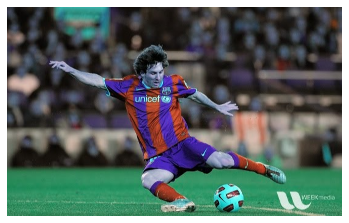

In [6]:
plt.axis("off")
plt.imshow(res)
plt.show()

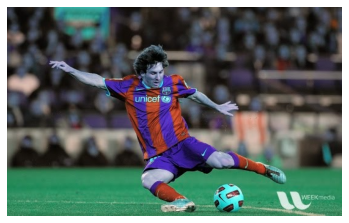

In [7]:
plt.axis("off")
plt.imshow(img)
plt.show()

In [8]:
import numpy as np
import cv2 as cv
img = cv.imread('/home/silvio/messi5.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))

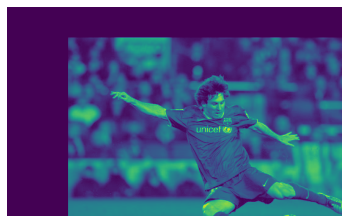

In [9]:
plt.axis("off")
plt.imshow(dst)
plt.show()

## Rotacionando a imagem

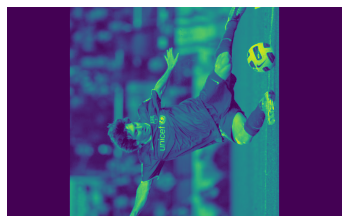

In [11]:
img = cv.imread('/home/silvio/messi5.jpg',0)
rows,cols = img.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))
plt.axis("off")
plt.imshow(dst)
plt.show()

## Transformação de Perspectiva

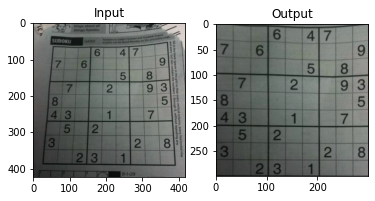

In [12]:
img = cv.imread('sudoku.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## thresholding

* Conversão de imagens em imagens binárias usando limiar global, limiar adaptável, binarização da Otsu etc.

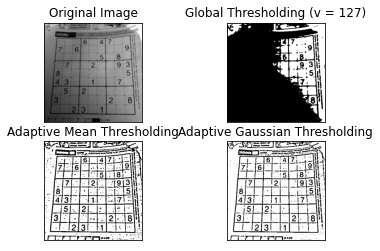

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('sudoku.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

TypeError: Image data of dtype object cannot be converted to float

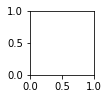

In [21]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('noisy2.png',0)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
#blur = cv.GaussianBlur(img,(5,5),0)
#ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          img, 0, th2]
          #blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
## Filtros

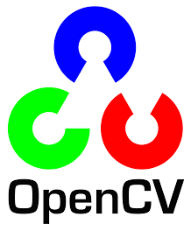

In [25]:
img1 = cv.imread('/home/silvio/opencvlogo.png')
plt.axis("off")
plt.imshow(img1)
plt.show()

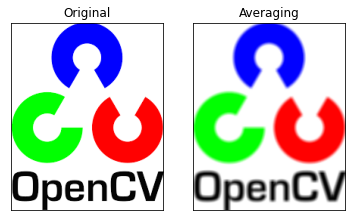

In [26]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/home/silvio/opencvlogo.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Blur

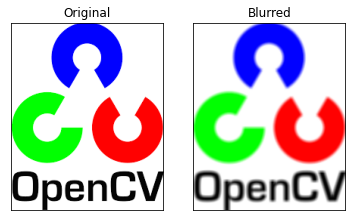

In [28]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/home/silvio/opencvlogo.png')
blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()


In [ ]:
## Gaussian blur

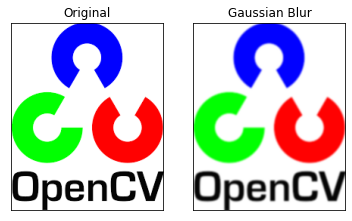

In [30]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/home/silvio/opencvlogo.png')
blurG = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurG),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

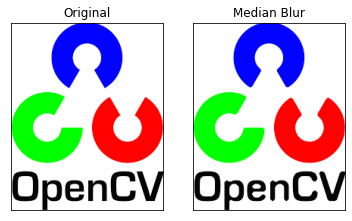

In [32]:


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/home/silvio/opencvlogo.png')
median = cv.medianBlur(img,5)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median Blur')
plt.xticks([]), plt.yticks([])
plt.show()

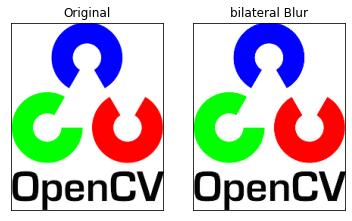

In [34]:


import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/home/silvio/opencvlogo.png')
biblur = cv.bilateralFilter(img,9,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(biblur),plt.title('bilateral Blur')
plt.xticks([]), plt.yticks([])
plt.show()

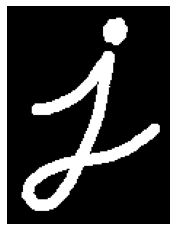

In [35]:
img = cv.imread('j.png')

plt.axis("off")
plt.imshow(img)
plt.show()

## Erosão

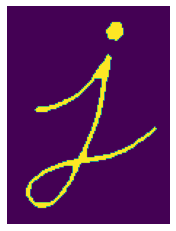

In [38]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

plt.axis("off")
plt.imshow(erosion)
plt.show()

## Dilatação

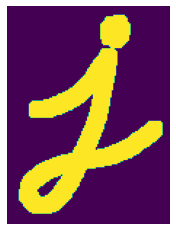

In [39]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)

plt.axis("off")
plt.imshow(dilation)
plt.show()

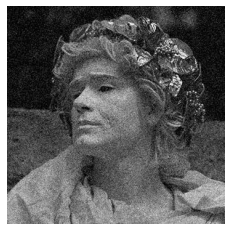

In [40]:
img = cv.imread('noisy.jpg')

plt.axis("off")
plt.imshow(img)
plt.show()


## Openning

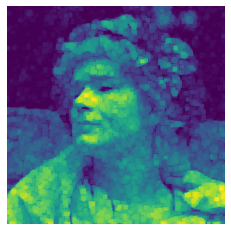

In [41]:
import cv2 as cv
import numpy as np
img = cv.imread('noisy.jpg',0)
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

plt.axis("off")
plt.imshow(opening)
plt.show()


## Closing

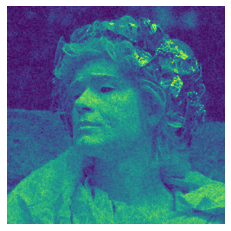

In [44]:
import cv2 as cv
import numpy as np
img = cv.imread('noisy.jpg',0)
kernel = np.ones((2,2),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.axis("off")
plt.imshow(closing)
plt.show()



## GRadiente morfologico

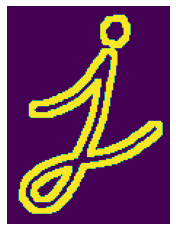

In [45]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.axis("off")
plt.imshow(gradient)
plt.show()


In [ ]:
## Tophat

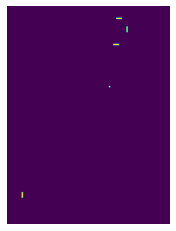

In [46]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

plt.axis("off")
plt.imshow(tophat)
plt.show()

## Black hat

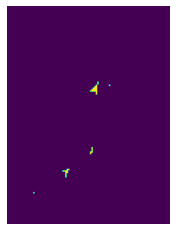

In [47]:
import cv2 as cv
import numpy as np
img = cv.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

plt.axis("off")
plt.imshow(blackhat)
plt.show()


## Filtros

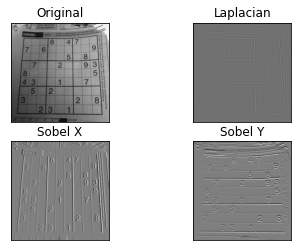

In [48]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('sudoku.jpg',0)

laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

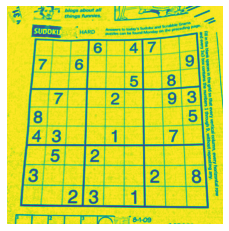

In [52]:
img = cv.imread('GINja.png',0)

plt.axis("off")
plt.imshow(img)
plt.show()

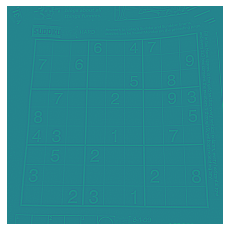

In [53]:
import cv2 as cv

img = cv.imread('GINja.png',0)

laplacian = cv.Laplacian(img,cv.CV_64F)

plt.axis("off")
plt.imshow(laplacian)
plt.show()

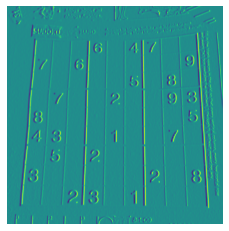

In [54]:
import cv2 as cv

img = cv.imread('GINja.png',0)

sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)

plt.axis("off")
plt.imshow(sobelx)
plt.show()

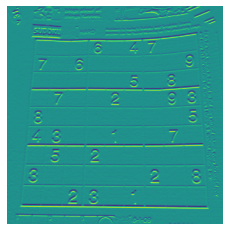

In [55]:
import cv2 as cv

img = cv.imread('GINja.png',0)

sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.axis("off")
plt.imshow(sobely)
plt.show()

In [ ]:
## Canny edge

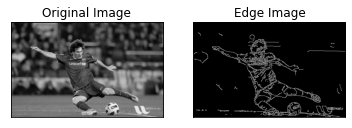

In [56]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('messi5.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

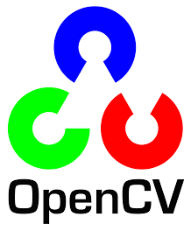

In [61]:
img = cv.imread('/home/silvio/opencvlogo.png')

plt.axis("off")
plt.imshow(img)
plt.show()

## Detectando círculos

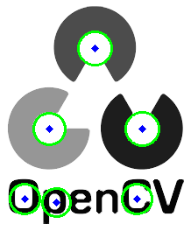

In [63]:
import numpy as np
import cv2 as cv
img = cv.imread('/home/silvio/opencvlogo.png',0)
img = cv.medianBlur(img,5)
cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
plt.axis("off")
plt.imshow(cimg)
plt.show()

## Hough Transform

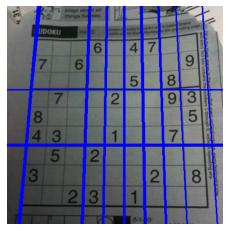

In [65]:
import cv2 as cv
import numpy as np
img = cv.imread(cv.samples.findFile('sudoku.jpg'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv.imwrite('houghlines3.jpg',img)
plt.axis("off")
plt.imshow(img)
plt.show()

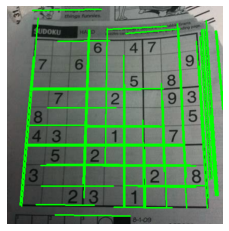

In [67]:
import cv2 as cv
import numpy as np
img = cv.imread(cv.samples.findFile('sudoku.jpg'))
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
cv.imwrite('houghlines5.jpg',img)
plt.axis("off")
plt.imshow(img)
plt.show()